# Assignment 3: Image Classification


**Assignment Responsible**: 
In this assignment, we will build a convolutional neural network that can predict 
whether two shoes are from the **same pair** or from two **different pairs**.
This kind of application can have real-world applications: for example to help
people who are visually impaired to have more independence.

We will explore two convolutional architectures. While we will give you starter
code to help make data processing a bit easier, in this assignment you have a chance to build your neural network all by yourself. 

You may modify the starter code as you see fit, including changing the signatures of
functions and adding/removing helper functions. However, please make sure that we can understand what you are doing and why.
 

In [ ]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

## Question 1. Data (20%)

Download the data from https://www.dropbox.com/s/6gdcpmfddojrl8o/data.rar?dl=0.

Unzip the file. There are three
main folders: `train`, `test_w` and `test_m`. Data in `train` will be used for
training and validation, and the data in the other folders will be used for testing.
This is so that the entire class will have the same test sets. The dataset is comprised of triplets of pairs, where each such triplet of image pairs was taken in a similar setting (by the same person).

We've separated `test_w` and `test_m` so that we can track our model performance 
for women's shoes and men's shoes separately. Each of the test sets contain images of either exclusively men's shoes or women's
shoes.

Upload this data to Google Colab.
Then, mount Google Drive from your Google Colab notebook:

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


After you have done so, read this entire section 
before proceeding. There are right and wrong ways of
processing this data. If you don't make the correct choices, you may find
yourself needing to start over.
Many machine learning projects fail because of the lack of care taken during
the data processing stage.

### Part (a) -- 8%

Load the training and test data, and separate your training data into training and validation.
Create the numpy arrays `train_data`, `valid_data`, `test_w` and `test_m`, all of which should
be of shape `[*, 3, 2, 224, 224, 3]`. The dimensions of these numpy arrays are as follows:

- `*` - the number of triplets allocated to train, valid, or test
- `3` - the 3 pairs of shoe images in that triplet
- `2` - the left/right shoes
- `224` - the height of each image
- `224` - the width of each image
- `3` - the colour channels

So, the item `train_data[4,0,0,:,:,:]` should give us the left shoe of the first image of the fifth person.The item `train_data[4,0,1,:,:,:]`  should be the right shoe in the same pair. 
The item `train_data[4,1,1,:,:,:]`  should be the right shoe in a different pair of that same person.

When you first load the images using (for example) `plt.imread`, you may see a numpy array of shape
`[224, 224, 4]` instead of `[224, 224, 3]`. That last channel is what's called the alpha channel for transparent
pixels, and should be removed. 
The pixel intensities are stored as an integer between 0 and 255.
Make sure you normlize your images, namely, divide the intensities by 255 so that you have floating-point values between 0 and 1. Then, subtract 0.5
so that the elements of `train_data`, `valid_data` and `test_data` are between -0.5 and 0.5.
**Note that this step actually makes a huge difference in training!**

This function might take a while to run; it can takes several minutes to just
load the files from Google Drive.  If you want to avoid
running this code multiple times, you can save 
your numpy arrays and load it later:
https://docs.scipy.org/doc/numpy/reference/generated/numpy.save.html

In [ ]:
# Your code goes here. Make sure it does not get cut off
# You can use the code below to help you get started. You're welcome to modify
# the code or remove it entirely: it's just here so that you don't get stuck
# reading files
import glob
path = "/content/gdrive/My Drive/Deep Learning Homeworks/Assignment3/data/train/*.jpg" # TODO - UPDATE ME!
images = {}
for file in glob.glob(path):
    filename = file.split("/")[-1]   # get the name of the .jpg file
    img = plt.imread(file)           # read the image as a numpy array
    images[filename] = img[:, :, :3] # remove the alpha channel (becase the we have we want RGB chanels) 


In [ ]:
def norm_img(img):
#this function normalize a RGB image 
# image is numpy array type
  img = img/255
  img = img - 0.5 
  return img 

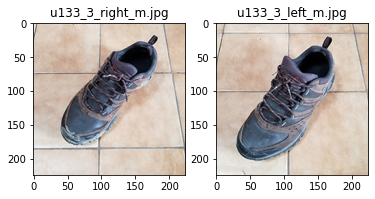

In [ ]:
fileNames_list = list(images.keys())
fileNames_list = sorted(fileNames_list) #sorted the list so we will be from first to last. 
num_shoe = len(fileNames_list)
num_shoe_pair = int(num_shoe/2)
num_people = int(num_shoe_pair/3)  
# we 672 shoe inputs and 336 pair of shoes from 112 different people
shoes_data  = np.empty([num_people,3, 2, 224, 224, 3])

for people in range(num_people):
  for pairOf3 in range(3):
    img_L = images[fileNames_list[people*6 + pairOf3*2 + 0]] #left
    img_R = images[fileNames_list[people*6 + pairOf3*2 + 1]] #right 
    shoes_data[people,pairOf3,0,:,:,:] = norm_img(img_L)
    shoes_data[people,pairOf3,1,:,:,:] = norm_img(img_R)

plt.figure()
plt.subplot(1,2,1)
plt.title(fileNames_list[people*6 + pairOf3*2 + 1])
plt.imshow(img_R)

plt.subplot(1,2,2)
plt.title(fileNames_list[people*6 + pairOf3*2 + 0])
plt.imshow(img_L)

#seaving the data 
path1 = "/content/gdrive/My Drive/Deep Learning Homeworks/Assignment3/"

np.save(path1+'shoes_data.npy',shoes_data)




we can see we got to the last 2 showes 





In [ ]:
#loading the data 
path2 = "/content/gdrive/My Drive/Deep Learning Homeworks/Assignment3/shoes_data.npy"
shoes_data = np.load(path2)

#dividing the data to train and validation
train_data, valid_data = (shoes_data[:100],shoes_data[100:])


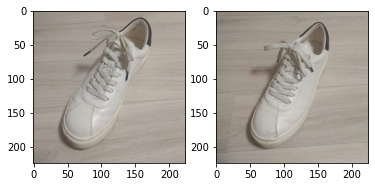

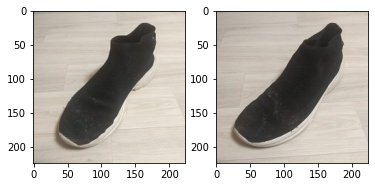

In [ ]:
# Run this code, include the image in your PDF submission

plt.figure()
plt.subplot(1,2,1)
plt.imshow(train_data[4,0,0,:,:,:] + 0.5) # left shoe of first pair submitted by 5th student
plt.subplot(1,2,2)
plt.imshow(train_data[4,0,1,:,:,:] + 0.5) # right shoe of first pair submitted by 5th student

plt.figure()
plt.subplot(1,2,1)
plt.imshow(train_data[4,1,0,:,:,:] + 0.5)
plt.subplot(1,2,2)
plt.imshow(train_data[4,1,1,:,:,:] + 0.5) # right shoe of second pair submitted by 5th student

In [ ]:
#test_m
path = "/content/gdrive/My Drive/Deep Learning Homeworks/Assignment3/data/test_m/*.jpg" # TODO - UPDATE ME!
images = {}
person=set()
for file in glob.glob(path):
    filename = file.split("/")[-1]   # get the name of the .jpg file
    img = plt.imread(file)   # read the image as a numpy array
    images[filename] = img[:, :, :3]/255 -0.5# remove the alpha channel
    person.add(filename[:4])

person=list(person)
#Create the numpy arrays train_data
test_m=np.empty((len(person),3, 2, 224, 224, 3))
keys_im=images.keys()

for i in range(len(person)):   #person i.
    for j in range(3):# pair of shoes.
        for k,side in enumerate(["left","right"]): # left or right.
            name=person[i]+"_"+str(j+1)+"_"+side+"_w.jpg"
            if name not in keys_im:
                name= person[i]+"_"+str(j+1)+"_"+side+"_m.jpg"
            test_m[i,j,k]=images[name]


#test_w
path = "/content/gdrive/My Drive/Deep Learning Homeworks/Assignment3/data/test_w/*.jpg" # TODO - UPDATE ME!
images = {}
person=set()
for file in glob.glob(path):
    filename = file.split("/")[-1]   # get the name of the .jpg file
    img = plt.imread(file)   # read the image as a numpy array
    images[filename] = img[:, :, :3]/255 -0.5# remove the alpha channel
    person.add(filename[:4])

person=list(person)
#Create the numpy arrays train_data
test_w=np.empty((len(person),3, 2, 224, 224, 3))
keys_im=images.keys()

for i in range(len(person)):   #person i.
    for j in range(3):# pair of shoes.
        for k,side in enumerate(["left","right"]): # left or right.
            name=person[i]+"_"+str(j+1)+"_"+side+"_w.jpg"
            if name not in keys_im:
                name= person[i]+"_"+str(j+1)+"_"+side+"_m.jpg"
            test_w[i,j,k]=images[name]

### Part (b) -- 4%

Since we want to train a model that determines whether two shoes come from the **same**
pair or **different** pairs, we need to create some labelled training data.
Our model will take in an image, either consisting of two shoes from the **same pair**
or from **different pairs**. So, we'll need to generate some *positive examples* with
images containing two shoes that *are* from the same pair, and some *negative examples* where 
images containing two shoes that *are not* from the same pair.
We'll generate the *positive examples* in this part, and the *negative examples* in the next part.

Write a function `generate_same_pair()` that takes one of the data sets that you produced
in part (a), and generates a numpy array where each pair of shoes in the data set is
concatenated together. In particular, we'll be concatenating together images of left
and right shoes along the **height** axis. Your function `generate_same_pair` should
return a  numpy array of shape `[*, 448, 224, 3]`.

While at this stage we are working with numpy arrays, later on, we will need to convert this numpy array into a PyTorch tensor with shape
`[*, 3, 448, 224]`. For now, we'll keep the RGB channel as the last dimension since
that's what `plt.imshow` requires.

(100, 3, 2, 224, 224, 3)
(300, 448, 224, 3)


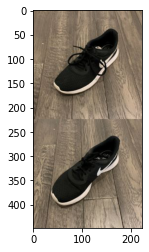

In [ ]:
# Your code goes here
def generate_same_pair(shoe_data):
  """
     reshape the images matrix that the paris will show 
     left and right shoes along the height axis.
    Arguments:
        shoe_data: numpy array        
    Returns:
        reshaped numpy matrix of size [N*3, 448, 224, 3] 
    """
  shoe_pair = np.empty([3*len(shoe_data), 2, 244, 244, 3])
  shoe_pair = shoe_data.reshape(3*len(shoe_data), 2, 224, 224, 3) 
  shoe_pair = shoe_pair.reshape(3*len(shoe_data), 2*224, 224, 3)    
  return shoe_pair


# Run this code, include the result with your PDF submission
print(train_data.shape) # if this is [N, 3, 2, 224, 224, 3]
print(generate_same_pair(train_data).shape) # should be [N*3, 448, 224, 3]
plt.imshow(generate_same_pair(train_data)[0] + 0.5) # should show 2 shoes from the same pair

### Part (c) -- 4%

Write a function `generate_different_pair()` that takes one of the data sets that
you produced in part (a), and generates a numpy array in the same shape as part (b).
However, each image will contain 2 shoes from a **different** pair, but submitted
by the **same student**. Do this by jumbling the 3 pairs of shoes submitted by 
each student.

Theoretically, for each person (triplet of pairs), there are 6 different combinations
of "wrong pairs" that we could produce. To keep our data set *balanced*, we will
only produce **three** combinations of wrong pairs per unique person.
In other words,`generate_same_pairs` and `generate_different_pairs` should
return the same number of training examples.

(100, 3, 2, 224, 224, 3)
(300, 448, 224, 3)


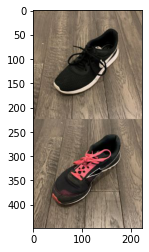

In [ ]:
# Your code goes here
def generate_different_pair(shoe_data):
  """
     rearrange images by shifting the right shoe for each person
     and than call generate_same_pairs to display paris 
     left and right shoes along the height axis.
    Arguments:
        shoe_data: numpy array        
    Returns:
        reshaped numpy matrix of size [N*3, 448, 224, 3] 
    """
  shoe_different = np.empty(shoe_data.shape)
  
  #shifting index of the images
  circ_shift = [2, 0, 1]
  shoe_different[:, :, 1, :, :, :] = shoe_data[:, circ_shift, 1, :, :, :]
  
  shoe_different[:, :, 0, :, :, :] = shoe_data[:, :, 0, :, :, :]

  return generate_same_pair(shoe_different)

# Run this code, include the result with your PDF submission
print(train_data.shape) # if this is [N, 3, 2, 224, 224, 3]
print(generate_different_pair(train_data).shape) # should be [N*3, 448, 224, 3]
plt.imshow(generate_different_pair(train_data)[0] + 0.5) # should show 2 shoes from different pairs

### Part (d) -- 2%

Why do we insist that the different pairs of shoes still come from the same
person?  (Hint: what else do images from the same person have in common?)

**Write your explanation here:**<br>
The reason is the person with 3 pairs of shoes, will probably have the same backgrund.<br>
becase of that, we want the model to tell the shoes are different from the features and **not** the backgrund.<br>
moreover, the size of the pair can be the same but the pair will be different.   

### Part (e) -- 2%

Why is it important that our data set be *balanced*? In other words suppose we created
a data set where 99% of the images are of shoes that are *not* from the same pair, and 
1% of the images are shoes that *are* from the same pair. Why could this be a problem?

**Write your explanation here:**<br> 
unbalanced model can give as false positives or false negatives, depends towards where the unbalanced lean to.

## Question 2. Convolutional Neural Networks (25%)

Before starting this question, we recommend reviewing the lecture and its associated example notebook on CNNs.

In this section, we will build two CNN models in PyTorch.

### Part (a) -- 9%

Implement a CNN model in PyTorch called `CNN` that will take images of size
$3 \times 448 \times 224$, and classify whether the images contain shoes from
the same pair or from different pairs.

The model should contain the following layers:

- A convolution layer that takes in 3 channels, and outputs $n$ channels.
- A $2 \times 2$ downsampling (either using a strided convolution in the previous step, or max pooling)
- A second convolution layer that takes in $n$ channels, and outputs $2\cdot n$ channels.
- A $2 \times 2$ downsampling (either using a strided convolution in the previous step, or max pooling)
- A third convolution layer that takes in $2\cdot n$ channels, and outputs $4\cdot n$ channels.
- A $2 \times 2$ downsampling (either using a strided convolution in the previous step, or max pooling)
- A fourth convolution layer that takes in $4\cdot n$ channels, and outputs $8\cdot n$ channels.
- A $2 \times 2$ downsampling (either using a strided convolution in the previous step, or max pooling)
- A fully-connected layer with 100 hidden units
- A fully-connected layer with 2 hidden units

Make the variable $n$ a parameter of your CNN. You can use either $3 \times 3$ or $5 \times 5$
convolutions kernels. Set your padding to be `(kernel_size - 1) / 2` so that your feature maps
have an even height/width.

Note that we are omitting in our description certain steps that practitioners will typically not mention,
like ReLU activations and reshaping operations. Use the example presented in class to figure out where they are.

In [ ]:
class CNN(nn.Module):
    def __init__(self, n=4, k_size=3):
        super(CNN, self).__init__()
        # TODO: complete this method
        pool = 2
        pad_size = int((k_size-1)/2)

        #input H0 = 448 W0 = 224 
        self.conv1 = nn.Conv2d(in_channels=3,
                              out_channels=n,
                              kernel_size=k_size,
                              stride=1,
                              padding=pad_size) 
        
        self.pool = nn.MaxPool2d(pool,pool)
        #after MaxPool and Conv H1 = 224 W1 = 112  
       
        self.conv2 = nn.Conv2d(in_channels=n,
                              out_channels=2*n,
                              kernel_size=k_size,
                              stride=1,
                              padding=pad_size)
        #after MaxPool and Conv H2 = 112 W2 = 56
        self.conv3 = nn.Conv2d(in_channels=2*n,
                              out_channels=4*n,
                              kernel_size=k_size,
                              stride=1,
                              padding=pad_size)
        #after MaxPool and Conv H3 = 56 W3 = 28
        self.conv4 = nn.Conv2d(in_channels=4*n,
                              out_channels=8*n,
                              kernel_size=k_size,
                              stride=1,
                              padding=pad_size) 
        #after MaxPool and Conv H3 = 28 W3 = 14
        
        
        self.fc1=nn.Linear(in_features= 8*n*28*14 , out_features=100)
         
        self.fc2=nn.Linear(in_features=100, out_features=2)
  
 
    # TODO: complete this class
    def forward(self, x):
      x = self.pool(F.relu(self.conv1(x)))
      x = self.pool(F.relu(self.conv2(x)))
      x = self.pool(F.relu(self.conv3(x)))
      x = self.pool(F.relu(self.conv4(x)))
      # fc layers 
      x = torch.flatten(x, 1)
      x = F.relu(self.fc1(x))

      #last function is with out relu becase CrossEntropyLoss in the train
      x = self.fc2(x)
      return x


### Part (b) -- 8%

Implement a CNN model in PyTorch called `CNNChannel` that contains the same layers as
in the Part (a), but with one crucial difference: instead of starting with an image
of shape $3 \times 448 \times 224$, we will first manipulate the image so that the
left and right shoes images are concatenated along the **channel** dimension.

<img src="https://drive.google.com/uc?id=1B59VE43X-6Dw3ag-9Ndn6vPEzbnFem8K" width="400px" />


Complete the manipulation in the `forward()` method (by slicing and using
the function `torch.cat`). The input to the first convolutional layer
should have 6 channels instead of 3 (input shape $6 \times 224 \times 224$).

Use the same hyperparameter choices as you did in part (a), e.g. for the kernel size,
choice of downsampling, and other choices.

In [ ]:
class CNNChannel(nn.Module):
    def __init__(self, n=4, k_size=5):
        super(CNNChannel, self).__init__()
        # TODO: complete this method
        pool = 2
        pad_size = int((k_size-1)/2)

        #input H0 = 224 W0 = 224 
        self.conv1 = nn.Conv2d(in_channels=6,
                              out_channels=n,
                              kernel_size=k_size,
                              stride=1,
                              padding=pad_size) 
        
        self.pool = nn.MaxPool2d(pool,pool)
        #after MaxPool and Conv H1 = 112 W1 = 112  
       
        self.conv2 = nn.Conv2d(in_channels=n,
                              out_channels=2*n,
                              kernel_size=k_size,
                              stride=1,
                              padding=pad_size)
        #after MaxPool and Conv H2 = 56 W2 = 56
        self.conv3 = nn.Conv2d(in_channels=2*n,
                              out_channels=4*n,
                              kernel_size=k_size,
                              stride=1,
                              padding=pad_size)
        #after MaxPool and Conv H3 = 28 W3 = 28
        self.conv4 = nn.Conv2d(in_channels=4*n,
                              out_channels=8*n,
                              kernel_size=k_size,
                              stride=1,
                              padding=pad_size) 
        #after MaxPool and Conv H3 = 14 W3 = 14
        
        
        self.fc1=nn.Linear(in_features= 8*n*14*14 , out_features=100)  
        self.fc2=nn.Linear(in_features=100, out_features=2)

    # TODO: complete this class
    def forward(self, x):

      x_new = torch.cat((x[:,:,:,:224],x[:,:,:,224:]),dim=1).float()
      x = self.pool(F.relu(self.conv1(x_new)))
      x = self.pool(F.relu(self.conv2(x)))
      x = self.pool(F.relu(self.conv3(x)))
      x = self.pool(F.relu(self.conv4(x)))

      # fc layers 
      x = torch.flatten(x, 1)
      x = F.relu(self.fc1(x))

      #last function is with out relu becase CrossEntropyLoss in the train
      x = self.fc2(x)
      return x


## Part (c) -- 4%

The two models are quite similar, and should have almost the same number of parameters.
However, one of these models will perform better, showing that architecture choices **do**
matter in machine learning. Explain why one of these models performs better.

**Write your explanation here:**<br>
We think that CNNChannel model will perform better.<br> the images are layered on top of each other, direct comparison of different positions on the images can be made more easily. the filters learns the coraspandens more in dapth.

In the CNN model, the images are side to side so it is harder to comper. more over, the model will need to do some mapping on the different corresponding regions on the 2 images.



## Part (d) -- 4%

The function `get_accuracy` is written for you. You may need to modify this
function depending on how you set up your model and training.

Unlike in the previous assignment, her we will separately compute the model accuracy on the
positive and negative samples.  Explain why we may wish to track the false positives and false negatives separately.

**Write your explanation here:**<br>
This way we will know if our model is balanced.<br>
Accuracy is a metric to check the error of the model.<br>We wish to track these two values separately because it is good practice since. <br>
we can see how our model perforrms on new unseen data.
The model error is caused by specific class, which accuracy won't tell us about. For example 50% accuracy might be 50% accuracy for each class, but also 100% accuracy for specific class and 0% for the other - the model has a constant decision.<br>
Also, this way we can observe how well the model classifies each type of cases,
which can lead to concluding too how efficient and well designed our model is.


In [ ]:
def get_accuracy(model, data, batch_size=50):
    """Compute the model accuracy on the data set. This function returns two
    separate values: the model accuracy on the positive samples,
    and the model accuracy on the negative samples.

    Example Usage:

    >>> model = CNN() # create untrained model
    >>> pos_acc, neg_acc= get_accuracy(model, valid_data)
    >>> false_positive = 1 - pos_acc
    >>> false_negative = 1 - neg_acc
    """

    model.eval()
    n = data.shape[0]

    data_pos = generate_same_pair(data)      # should have shape [n * 3, 448, 224, 3]
    data_neg = generate_different_pair(data) # should have shape [n * 3, 448, 224, 3]

    pos_correct = 0
    for i in range(0, len(data_pos), batch_size):
        xs = torch.Tensor(data_pos[i:i+batch_size]).transpose(1, 3)
        zs = model(xs)
        pred = zs.max(1, keepdim=True)[1] # get the index of the max logit
        pred = pred.detach().numpy()
        pos_correct += (pred == 1).sum()
    
    neg_correct = 0
    for i in range(0, len(data_neg), batch_size):
        xs = torch.Tensor(data_neg[i:i+batch_size]).transpose(1, 3)
        zs = model(xs)
        pred = zs.max(1, keepdim=True)[1] # get the index of the max logit
        pred = pred.detach().numpy()
        neg_correct += (pred == 0).sum()

    return pos_correct / (n * 3), neg_correct / (n * 3)

## Question 3. Training (40%)

Now, we will write the functions required to train the model. 

Although our task is a binary classification problem, we will still use the architecture
of a multi-class classification problem. That is, we'll use a one-hot vector to represent
our target (like we did in the previous assignment). We'll also use `CrossEntropyLoss` instead of
`BCEWithLogitsLoss` (this is a standard practice in machine learning because
this architecture often performs better).

### Part (a) -- 22%

Write the function `train_model` that takes in (as parameters) the model, training data,
validation data, and other hyperparameters like the batch size, weight decay, etc.
This function should be somewhat similar to the training code that you wrote
in Assignment 2, but with a major difference in the way we treat our training data.

Since our positive (shoes of the same pair) and negative (shoes of different pairs) training sets are separate, it is actually easier for
us to generate separate minibatches of positive and negative training data.
 In
each iteration, we'll take `batch_size / 2` positive samples and `batch_size / 2`
negative samples. We will also generate labels of 1's for the positive samples,
and 0's for the negative samples.

Here is what your training function should include:

- main training loop; choice of loss function; choice of optimizer
- obtaining the positive and negative samples
- shuffling the positive and negative samples at the start of each epoch
- in each iteration, take `batch_size / 2` positive samples and `batch_size / 2` negative samples
  as our input for this batch
- in each iteration, take `np.ones(batch_size / 2)` as the labels for the positive samples, and 
  `np.zeros(batch_size / 2)` as the labels for the negative samples
- conversion from numpy arrays to PyTorch tensors, making sure that the input has dimensions $N \times C \times H \times W$ (known as NCHW tensor), where $N$ is the number of images batch size, $C$ is the number of channels, $H$ is the height of the image, and $W$ is the width of the image. 
- computing the forward and backward passes 
- after every epoch, report the accuracies for the training set and validation set
- track the training curve information and plot the training curve

It is also recommended to checkpoint your model (save a copy) after every epoch, as we did in Assignment 2.

In [ ]:
# Write your code here
def train_model(CNN_model, train_data, valid_data, batch_size, weight_decay = 0, learning_rate = 0.001, num_epochs=0, checkpoint_path=None):
   
    #tell the model we are training 
    #CNN_model.train()   
    #choice of loss function
    criterion = nn.CrossEntropyLoss() 
    #choice of optimizer
    optimizer = optim.Adam(CNN_model.parameters(),
                            lr=learning_rate,
                            weight_decay=weight_decay)
    
    iters, losses = [], []
    iters_sub, train_accs, val_accs  = [], [] ,[]
    train_accs_pos, train_accs_neg = [],[]
    
    data_postive = generate_same_pair(train_data)
    data_ngetive = generate_different_pair(train_data)

    #number of itarations 
    n = 0
    max_val_acc = 0
    #main loop
    for epoch in range(num_epochs):
        '''p = np.random.permutation(len(data_postive))
        data_postive = data_postive[p]
        data_ngetive = data_ngetive[p]'''
        np.random.shuffle(data_postive)
        np.random.shuffle(data_ngetive)
        CNN_model.train()

        #batch_size loop
        for i in range(0, data_postive.shape[0], batch_size//2):
            if (i + batch_size//2) > data_postive.shape[0]:
                continue
            #increment iterator    
            n += 1    
            #transform to tensor and NCHW
            xt_pos = torch.Tensor(data_postive[i : i + batch_size//2]).transpose(1, 3)
            xt_nge = torch.Tensor(data_ngetive[i : i + batch_size//2]).transpose(1, 3)
            xt = torch.cat((xt_pos, xt_nge), 0)#, 0

            #postive and ngative labels
            st_postive = np.ones(batch_size // 2)    
            st_ngetive = np.zeros(batch_size // 2)
            st_data = np.concatenate((st_postive, st_ngetive), axis=0)#, axis=0
            st = torch.Tensor(st_data).long()
           
            # compute prediction logit
            zs = CNN_model(xt)              #out data  
            loss = criterion(zs, st)        # compute the total loss
            optimizer.zero_grad()           # a clean up step for PyTorch
            loss.backward()                 # compute updates for each parameter
            optimizer.step()                # make the updates for each parame
            
            
            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)  # compute *average* loss

        #ENDbatch loop
        
        iters_sub.append(n)
        train_cost = float(loss.detach().numpy())
        #train accuracy
        pos_acc_train, neg_acc_train = get_accuracy(CNN_model, train_data)
        train_accs_neg.append(neg_acc_train)
        train_accs_pos.append(pos_acc_train)
        train_accs.append((pos_acc_train + neg_acc_train)/2)
        #valadation accuracy
        pos_acc_val, neg_acc_val = get_accuracy(CNN_model, valid_data)
        val_accs.append((pos_acc_val + neg_acc_val)/2)
        print("Iter %d. [Val Acc %.0f%%] [Train Acc %.0f%%, Train neg Acc %.0f%%, Train pos Acc %.0f%%, Loss %f]" % (
                      n, val_accs[-1] * 100,train_accs[-1] * 100, train_accs_neg[-1] * 100, train_accs_pos[-1] * 100,train_cost))
        if (checkpoint_path is not None) and n > 0:
            if (pos_acc_val + neg_acc_val)/2 >= max_val_acc:
                max_val_acc = (pos_acc_val + neg_acc_val)/2
                torch.save(CNN_model, checkpoint_path)


    #end main for

    return iters, losses, iters_sub, train_accs, val_accs, train_accs_pos, train_accs_neg 


def plot_learning_curve(iters, losses, iters_sub, train_accs, val_accs, train_accs_pos, train_accs_neg):
    """
    Plot the learning curve.
    """
    plt.title("Learning Curve: Loss per Iteration")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.figure()
    plt.subplot(1,2,1)
    plt.title("Learning Curve: Accuracy per Iteration")
    plt.plot(iters_sub, train_accs, label="Train ave")
    plt.plot(iters_sub, val_accs, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
   

    plt.figure()
    plt.title("Learning Curve: Pos and Neg Accuracy per Iteration")
    plt.plot(iters_sub, train_accs_pos, label="Train pos")
    plt.plot(iters_sub, train_accs_neg, label="Train neg")
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()  


### Part (b) -- 6%

Sanity check your code from Q3(a) and from Q2(a) and Q2(b) by showing that your models
can memorize a very small subset of the training set (e.g. 5 images).
You should be able to achieve 90%+ accuracy (don't forget to calculate the accuracy)
relatively quickly (within ~30 or so iterations).


(Start with the second network, it is easier to converge)

Try to find the general parameters combination that work for each network, it can help you a little bit later.

Iter 7. [Val Acc 63%] [Train Acc 60%, Train neg Acc 33%, Train pos Acc 87%, Loss 0.693159]
Iter 14. [Val Acc 43%] [Train Acc 57%, Train neg Acc 67%, Train pos Acc 47%, Loss 0.692797]
Iter 21. [Val Acc 57%] [Train Acc 70%, Train neg Acc 40%, Train pos Acc 100%, Loss 0.684906]
Iter 28. [Val Acc 63%] [Train Acc 73%, Train neg Acc 47%, Train pos Acc 100%, Loss 0.647123]
Iter 35. [Val Acc 67%] [Train Acc 80%, Train neg Acc 67%, Train pos Acc 93%, Loss 0.676803]
Iter 42. [Val Acc 70%] [Train Acc 87%, Train neg Acc 73%, Train pos Acc 100%, Loss 0.243916]
Iter 49. [Val Acc 73%] [Train Acc 97%, Train neg Acc 100%, Train pos Acc 93%, Loss 0.242616]
Iter 56. [Val Acc 67%] [Train Acc 83%, Train neg Acc 67%, Train pos Acc 100%, Loss 0.227138]
Iter 63. [Val Acc 70%] [Train Acc 90%, Train neg Acc 100%, Train pos Acc 80%, Loss 0.491790]
Iter 70. [Val Acc 73%] [Train Acc 93%, Train neg Acc 87%, Train pos Acc 100%, Loss 0.201870]
Iter 77. [Val Acc 80%] [Train Acc 90%, Train neg Acc 80%, Train pos Acc 10

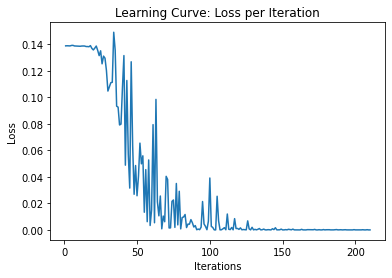

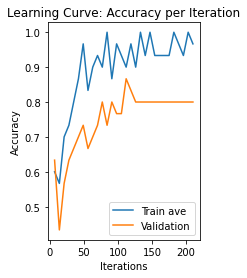

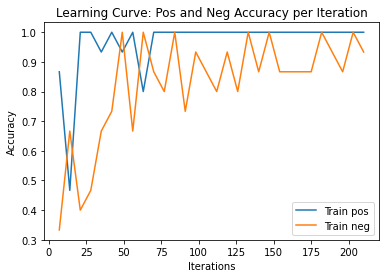

In [ ]:
# Write your code here. Remember to include your results so that we can
# see that your model attains a high training accuracy. 

## CNNChannel
small_train = train_data[:5]
n = 4
k_size = 5
LR = 0.0005
path1 = '/content/gdrive/My Drive/Deep Learning Homeworks/Assignment3/CNNChannel_Q3b.pt'
epochs = 30

model_CNNChannel = CNNChannel(n=n,k_size=k_size)
model_cnn = CNN(n=n,k_size=k_size)

learning_curve_info = train_model(model_CNNChannel,train_data = small_train,
                                                  valid_data = valid_data[:5],
                                                  batch_size = 5,
                                                  learning_rate=LR,
                                                  weight_decay = 0,
                                                  num_epochs = epochs,
                                                  checkpoint_path = path1)


plot_learning_curve(*learning_curve_info)

Iter 3. [Val Acc 53%] [Train Acc 47%, Train neg Acc 0%, Train pos Acc 93%, Loss 0.694719]
Iter 6. [Val Acc 50%] [Train Acc 50%, Train neg Acc 100%, Train pos Acc 0%, Loss 0.693513]
Iter 9. [Val Acc 50%] [Train Acc 50%, Train neg Acc 100%, Train pos Acc 0%, Loss 0.693359]
Iter 12. [Val Acc 50%] [Train Acc 50%, Train neg Acc 100%, Train pos Acc 0%, Loss 0.692675]
Iter 15. [Val Acc 50%] [Train Acc 50%, Train neg Acc 100%, Train pos Acc 0%, Loss 0.693198]
Iter 18. [Val Acc 47%] [Train Acc 60%, Train neg Acc 33%, Train pos Acc 87%, Loss 0.692897]
Iter 21. [Val Acc 50%] [Train Acc 50%, Train neg Acc 0%, Train pos Acc 100%, Loss 0.693312]
Iter 24. [Val Acc 50%] [Train Acc 50%, Train neg Acc 0%, Train pos Acc 100%, Loss 0.693226]
Iter 27. [Val Acc 53%] [Train Acc 50%, Train neg Acc 0%, Train pos Acc 100%, Loss 0.692619]
Iter 30. [Val Acc 53%] [Train Acc 70%, Train neg Acc 67%, Train pos Acc 73%, Loss 0.692940]
Iter 33. [Val Acc 50%] [Train Acc 53%, Train neg Acc 100%, Train pos Acc 7%, Loss 0.

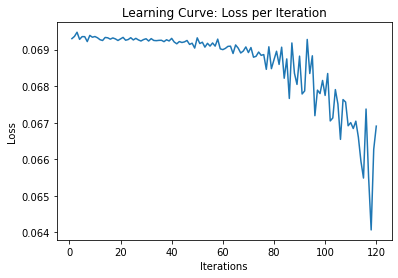

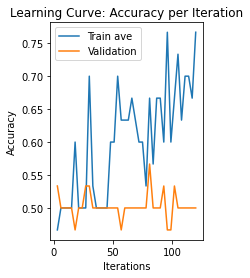

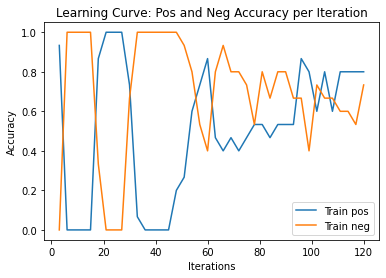

In [ ]:
## CNN network 
n = 6
k_size = 5
model_cnn = CNN(n=n,k_size=k_size)
path2 = '/content/gdrive/My Drive/Deep Learning Homeworks/Assignment3/CNN_Q3b.pt'
epochs = 40
small_train = train_data[:5]
LR = 0.00005
batch_size = 4
learning_curve_info = train_model(model_cnn,train_data = small_train,
                                                  valid_data = valid_data[:5],
                                                  batch_size = 10,
                                                  learning_rate=LR,
                                                  weight_decay = 0,
                                                  num_epochs = epochs,
                                                  checkpoint_path = path2)


plot_learning_curve(*learning_curve_info)

### Part (c) -- 8%

Train your models from Q2(a) and Q2(b). Change the values of a few 
hyperparameters, including the learning rate, batch size, choice of $n$, and 
the kernel size. You do not need to check all values for all hyperparameters. Instead, try to make big changes to see how each change affect your scores.
(try to start with finding a resonable learning rate for each network, that start changing the other parameters, the first network might need bigger $n$ and kernel size)

In this section, explain how you tuned your hyperparameters.

**Write your explanation here:**<br>
we ran loops for the hyperparameters in low number of epoches to get a feel for it. 

after that increste the number of epochs and played around with it, increased when we could improve and decrease when we got the same results over and over. 

betch size we we increase and decreased depending on how much noise we had in the loss and how long was the learning.



Iter 7. [Val Acc 49%] [Train Acc 65%, Train neg Acc 70%, Train pos Acc 59%, Loss 0.691078]
Iter 14. [Val Acc 50%] [Train Acc 63%, Train neg Acc 67%, Train pos Acc 60%, Loss 0.687896]
Iter 21. [Val Acc 51%] [Train Acc 66%, Train neg Acc 61%, Train pos Acc 72%, Loss 0.694031]
Iter 28. [Val Acc 53%] [Train Acc 65%, Train neg Acc 62%, Train pos Acc 68%, Loss 0.681339]
Iter 35. [Val Acc 53%] [Train Acc 66%, Train neg Acc 64%, Train pos Acc 67%, Loss 0.690454]
Iter 42. [Val Acc 51%] [Train Acc 67%, Train neg Acc 68%, Train pos Acc 66%, Loss 0.699585]
Iter 49. [Val Acc 54%] [Train Acc 68%, Train neg Acc 68%, Train pos Acc 67%, Loss 0.688106]
Iter 56. [Val Acc 54%] [Train Acc 68%, Train neg Acc 68%, Train pos Acc 68%, Loss 0.690366]
Iter 63. [Val Acc 56%] [Train Acc 66%, Train neg Acc 71%, Train pos Acc 62%, Loss 0.680393]
Iter 70. [Val Acc 57%] [Train Acc 66%, Train neg Acc 65%, Train pos Acc 68%, Loss 0.677145]
Iter 77. [Val Acc 57%] [Train Acc 66%, Train neg Acc 69%, Train pos Acc 64%, Loss

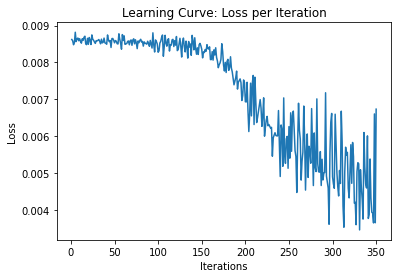

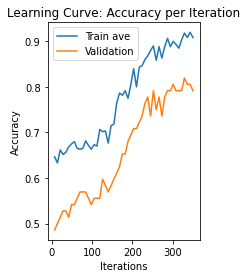

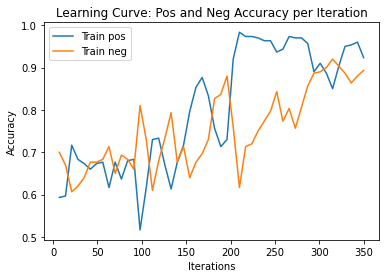

In [ ]:
# Include the training curves for the two models.
LR = 0.00005
path3 = '/content/gdrive/My Drive/Deep Learning Homeworks/Assignment3/CNNChannel_Q3c.pt'
model_CNNChannel = CNNChannel(n = 6,k_size = 5)
learning_curve_info1 = train_model(model_cnn,train_data = train_data,
                                                  valid_data = valid_data,
                                                  batch_size = 80,
                                                  learning_rate=LR,
                                                  weight_decay = 0,
                                                  num_epochs = 50,
                                                  checkpoint_path = path3)
plot_learning_curve(*learning_curve_info1)

#60% for n = 4 kernel = 3 batch_size = 30 num_epochs = 40
#76% for n = 6 kernel = 5 batch_size = 30 num_epochs = 30
#78% for n = 6 kernel = 5 batch_size = 80 num_epochs = 30

Iter 7. [Val Acc 50%] [Train Acc 50%, Train neg Acc 100%, Train pos Acc 0%, Loss 0.693208]
Iter 14. [Val Acc 50%] [Train Acc 55%, Train neg Acc 87%, Train pos Acc 23%, Loss 0.693371]
Iter 21. [Val Acc 51%] [Train Acc 50%, Train neg Acc 0%, Train pos Acc 100%, Loss 0.693055]
Iter 28. [Val Acc 56%] [Train Acc 58%, Train neg Acc 60%, Train pos Acc 56%, Loss 0.692938]
Iter 35. [Val Acc 53%] [Train Acc 55%, Train neg Acc 96%, Train pos Acc 15%, Loss 0.692984]
Iter 42. [Val Acc 54%] [Train Acc 60%, Train neg Acc 81%, Train pos Acc 39%, Loss 0.691478]
Iter 49. [Val Acc 54%] [Train Acc 61%, Train neg Acc 57%, Train pos Acc 65%, Loss 0.689180]
Iter 56. [Val Acc 51%] [Train Acc 58%, Train neg Acc 71%, Train pos Acc 45%, Loss 0.692417]
Iter 63. [Val Acc 57%] [Train Acc 61%, Train neg Acc 56%, Train pos Acc 67%, Loss 0.685883]
Iter 70. [Val Acc 56%] [Train Acc 64%, Train neg Acc 44%, Train pos Acc 84%, Loss 0.679179]
Iter 77. [Val Acc 58%] [Train Acc 67%, Train neg Acc 52%, Train pos Acc 82%, Loss

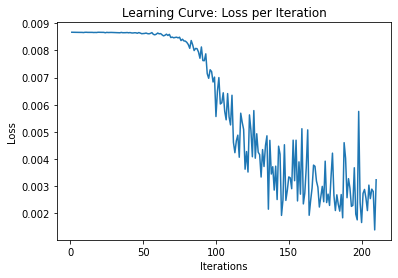

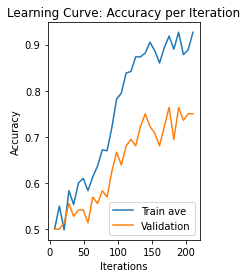

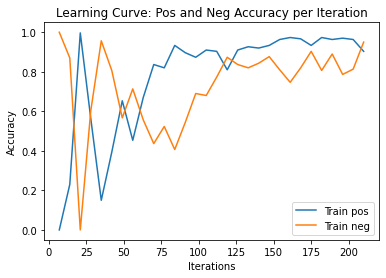

In [ ]:
path4 = '/content/gdrive/My Drive/Deep Learning Homeworks/Assignment3/CNN_Q3c.pt'

#CNN 
model_cnn = CNN(n = 6,k_size = 7) 
LR = 0.00005
learning_curve_info2 = train_model(model_cnn,train_data = train_data,
                                    valid_data = valid_data,
                                    batch_size = 80,
                                    learning_rate=LR,
                                    weight_decay = 0,
                                    num_epochs = 30,
                                    checkpoint_path = path4)
plot_learning_curve(*learning_curve_info2)
              

### Part (d) -- 4%

Include your training curves for the **best** models from each of Q2(a) and Q2(b).
These are the models that you will use in Question 4.

In [ ]:
# Include the training curves for the two models.
#see the best curves the previous question
#CNN we got 76% in validation 
#CNNChannel we got in 82% validation


## Question 4. Testing (15%)

### Part (a) -- 7%

Report the test accuracies of your **single best** model,
separately for the two test sets.
Do this by choosing the  model
architecture that produces the best validation accuracy. For instance,
if your model attained the
best validation accuracy in epoch 12, then the weights at epoch 12 is what you should be using
to report the test accuracy.

In [ ]:
# Write your code here. Make sure to include the test accuracy in your report
path3 = '/content/gdrive/My Drive/Deep Learning Homeworks/Assignment3/CNNChannel_Q3c.pt'
model = torch.load(path3)
test_m_acc=get_accuracy(model,test_m, batch_size=10)
total_acc_test_m=(test_m_acc[0]+test_m_acc[1])/2

test_w_acc=get_accuracy(model,test_w, batch_size=10)
total_acc_test_w=(test_w_acc[0]+test_w_acc[1])/2

print('test_m: Total accurecy = {:.2f}% pos accurecy = {:.2f}% neg accurecy = {:.2f}%'.format(100*total_acc_test_m,100*test_m_acc[0],100*test_m_acc[1]))
print('test_w: Total accurecy = {:.2f}% pos accurecy = {:.2f}% neg accurecy = {:.2f}%'.format(100*total_acc_test_w,100*test_w_acc[0],100*test_w_acc[1]))

test_m: Total accurecy = 70.00% pos accurecy = 86.67% neg accurecy = 53.33%
test_w: Total accurecy = 80.00% pos accurecy = 90.00% neg accurecy = 70.00%


### Part (b) -- 4%

Display one set of men's shoes that your model correctly classified as being
from the same pair.

If your test accuracy was not 100% on the men's shoes test set,
display one set of inputs that your model classified incorrectly.

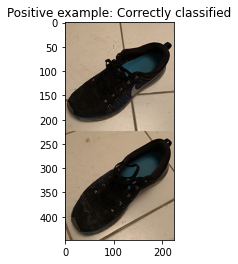

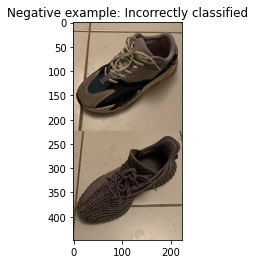

In [ ]:
model.eval()
n = test_m.shape[0]

data_pos = generate_same_pair(test_m)      # should have shape [n * 3, 448, 224, 3]

pos_correct_flag = 0
pos_incorrect_flag = 0

data_pos = generate_same_pair(test_m)
data_neg = generate_different_pair(test_m)
is_shown_correct = False
is_shown_incorrect = False
for i in range(0, len(data_pos), 1):

    if is_shown_correct and is_shown_incorrect:
        break

    xs_pos = torch.Tensor(data_pos[i:i+1]).transpose(1, 3)
    xs_neg = torch.Tensor(data_neg[i:i+1]).transpose(1, 3)
    zs_pos = model(xs_pos)
    zs_neg = model(xs_neg)
    pred_pos = zs_pos.max(1, keepdim=True)[1] # get the index of the max logit
    pred_neg = zs_neg.max(1, keepdim=True)[1] # get the index of the max logit
    pred_pos = pred_pos.detach().numpy()
    pred_neg = pred_neg.detach().numpy()
    
    if pred_pos == 1 and is_shown_correct == False:
        plt.figure()
        plt.imshow(data_pos[i]+0.5) # add 0.5 to brighten image
        plt.title("Positive example: Correctly classified")
        is_shown_correct = True
    elif pred_pos == 0 and is_shown_incorrect == False:
        plt.figure()
        plt.imshow(data_neg[i]+0.5) # add 0.5 to brighten image
        plt.title("Positive example: Incorrectly classified")
        is_shown_incorrect = True
    elif pred_neg == 1 and is_shown_incorrect == False:
        plt.figure()
        plt.imshow(data_neg[i]+0.5) # add 0.5 to brighten image
        plt.title("Negative example: Incorrectly classified")
        is_shown_incorrect = True
    else:
      continue


### Part (c) -- 4%

Display one set of women's shoes that your model correctly classified as being
from the same pair.

If your test accuracy was not 100% on the women's shoes test set,
display one set of inputs that your model classified incorrectly.

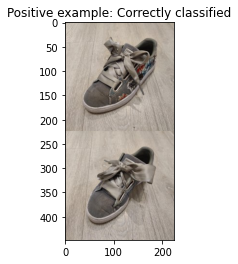

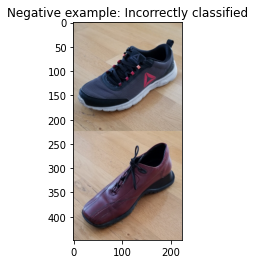

In [ ]:
data_pos = generate_same_pair(test_w)
data_neg = generate_different_pair(test_w)
is_shown_correct = False
is_shown_incorrect = False

for i in range(0, len(data_pos), 1):
    if is_shown_correct and is_shown_incorrect:
        break

    xs_pos = torch.Tensor(data_pos[i:i+1]).transpose(1, 3)
    xs_neg = torch.Tensor(data_neg[i:i+1]).transpose(1, 3)
    zs_pos = model(xs_pos)
    zs_neg = model(xs_neg)
    pred_pos = zs_pos.max(1, keepdim=True)[1] # get the index of the max logit
    pred_neg = zs_neg.max(1, keepdim=True)[1] # get the index of the max logit
    pred_pos = pred_pos.detach().numpy()
    pred_neg = pred_neg.detach().numpy()
    
    if pred_pos == 1 and is_shown_correct == False:
        plt.figure()
        plt.imshow(data_pos[i]+0.5) # add 0.5 to brighten image
        plt.title("Positive example: Correctly classified")
        is_shown_correct = True
    elif pred_pos == 0 and is_shown_incorrect == False:
        plt.figure()
        plt.imshow(data_neg[i]+0.5) # add 0.5 to brighten image
        plt.title("Positive example: Incorrectly classified")
        is_shown_incorrect = True
    elif pred_neg == 1 and is_shown_incorrect == False:
        plt.figure()
        plt.imshow(data_neg[i]+0.5) # add 0.5 to brighten image
        plt.title("Negative example: Incorrectly classified")
        is_shown_incorrect = True
    else:
      continue
